# DS 203 Project
## Potentially Hazardous Asteroid Detection
_________

### I) EDA

In [1]:
!pip install seaborn==0.11.0
#need not do this locally if you have this version installed
#add a header text file saying ds203 project pha thing eda part

You should consider upgrading via the 'c:\users\darin jeff\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [162]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
df1 = pd.read_csv('ds1.csv')
df2 = pd.read_csv("results.csv")
display(df1)

C:\Users\DARIN JEFF\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,5,11,16,17,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Motion,Equinox,pha
0,3703080,21.600,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,0.590551,J2000,1
1,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,0.845330,J2000,0
2,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,0.559371,J2000,1
3,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,0.700277,J2000,0
4,3514799,21.600,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,933.308089,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,0.726395,J2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,...,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,0.787436,J2000,0
4683,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,...,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,0.884117,J2000,0
4684,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,562.373736,...,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,0.521698,J2000,0
4685,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,...,1.486600,21.080244,163.802909,662.048343,1.185467,180.346090,1.787733,0.543767,J2000,0


In [4]:
display(df2)

,id,Neo Reference ID,full_name,pdes,name,prefix,neo,pha,Absolute Magnitude,G,...,last_obs,n_obs_used,n_del_obs_used,n_dop_obs_used,condition_code,rms,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,a0000433,2000433,433 Eros (A898 PA),433,Eros,NaN,Y,0.0,10.400,0.46,...,03-09-2020,8767,4.0,2.0,0,0.28397,NaN,NaN,NaN,NaN
1,a0000719,2000719,719 Albert (A911 TB),719,Albert,NaN,Y,0.0,15.500,NaN,...,27-02-2020,1874,NaN,NaN,0,0.39148,NaN,NaN,NaN,NaN
2,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,0.0,13.800,-0.12,...,02-12-2020,1884,NaN,NaN,0,0.44039,NaN,NaN,NaN,NaN
3,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,0.0,9.400,0.30,...,03-12-2020,6436,0.0,1.0,0,0.38018,NaN,NaN,NaN,NaN
4,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,0.0,17.700,NaN,...,14-09-2020,552,NaN,NaN,0,0.45839,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24411,bK20W05T,54097669,(2020 WT5),2020 WT5,NaN,NaN,Y,1.0,21.967,NaN,...,02-12-2020,21,NaN,NaN,9,0.26581,NaN,NaN,NaN,NaN
24412,bK20W05U,54097670,(2020 WU5),2020 WU5,NaN,NaN,Y,0.0,18.926,NaN,...,03-12-2020,24,NaN,NaN,9,0.36491,NaN,NaN,NaN,NaN
24413,bK20X00A,54097667,(2020 XA),2020 XA,NaN,NaN,Y,0.0,23.463,NaN,...,03-12-2020,20,NaN,NaN,8,0.45779,NaN,NaN,NaN,NaN
24414,bK20X00B,54097668,(2020 XB),2020 XB,NaN,NaN,Y,0.0,25.282,NaN,...,02-12-2020,28,NaN,NaN,8,0.43094,NaN,NaN,NaN,NaN


In [5]:
df2 = df2.drop("Unnamed: 58",axis = 1) 
df2 = df2.drop("Unnamed: 59",axis = 1) 
df2 = df2.drop("Unnamed: 60",axis = 1) 
df2 = df2.drop("Unnamed: 61",axis = 1) 

In [6]:
print('df1 number of records = '+str(df1.shape[0]))
print('df1 number of variables = '+str(df1.shape[1]))
print('df2 number of records = '+str(df2.shape[0]))
print('df2 number of variables = '+str(df2.shape[1]))

df1 number of records = 4687
df1 number of variables = 36
df2 number of records = 24416
df2 number of variables = 58


In [7]:
df1_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df1.columns.values:
    list_vals = pd.unique(df1[col])
    df1_stats = df1_stats.append({"Field_name":col, "Type":str(df1[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isnull(df1[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df1[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are: ' +list_str[0:len(list_str)-2])
            
display(df1_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)    

The only enteries in the field Orbiting Body are: Earth
The only enteries in the field Equinox are: J2000
The only enteries in the field pha are: 1, 0


,Field_name,Type,No_unique_vals,No_null_enteries
0,Neo Reference ID,int64,3692,0
1,Absolute Magnitude,float64,269,0
2,Est Dia in KM(min),float64,269,0
3,Est Dia in KM(max),float64,269,0
4,Est Dia in M(min),float64,269,0
5,Est Dia in M(max),float64,269,0
6,Est Dia in Miles(min),float64,269,0
7,Est Dia in Miles(max),float64,269,0
8,Est Dia in Feet(min),float64,269,0
9,Est Dia in Feet(max),float64,269,0


 
The number of columns with no missing entries are 36


In [8]:
df1 = df1.drop("Est Dia in M(min)",axis = 1) #Redundant
df1 = df1.drop("Est Dia in M(max)",axis = 1) #Redundant
df1 = df1.drop("Est Dia in Miles(min)",axis = 1) #Redundant
df1 = df1.drop("Est Dia in Miles(max)",axis = 1) #Redundant
df1 = df1.drop("Est Dia in Feet(min)",axis = 1) #Redundant
df1 = df1.drop("Est Dia in Feet(max)",axis = 1) #Redundant
df1 = df1.drop("Close Approach Date",axis = 1) #Not useful as we aren't analysing time series
df1 = df1.drop("Epoch Date Close Approach",axis = 1) #Not useful as we aren't analysing time series
df1 = df1.drop("Relative Velocity km per hr",axis = 1) #Redundant
df1 = df1.drop("Miles per hour",axis = 1) #Redundant
df1 = df1.drop("Miss Dist.(Astronomical)",axis = 1) #Redundant
df1 = df1.drop("Miss Dist.(lunar)",axis = 1) #Redundant
df1 = df1.drop("Miss Dist.(miles)",axis = 1) #Redundant
df1 = df1.drop("Orbiting Body",axis = 1) #single valued
df1 = df1.drop("Orbit Determination Date",axis = 1) #Not useful as we aren't analysing time series
df1 = df1.drop("Equinox",axis = 1) #single valued

In [9]:
df2_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df2.columns.values:
    list_vals = pd.unique(df2[col])
    df2_stats = df2_stats.append({"Field_name":col, "Type":str(df2[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isnull(df2[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df2[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) <= 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df2_stats)

print(" ")
print("The number of columns with no missing entries are",no_missing_entries)    

The only enteries in the field prefix are:nan, A
The only enteries in the field neo are:Y
The only enteries in the field pha are:0.0, 1.0, nan
The only enteries in the field extent are:34.4x11.2x11.2, nan, 5.0x2.0x2.1, 1.11 x 0.53 x 0.50, 1.70x2.03x4.26, 2.35 x 1.65 x 1.44, 0.535x0.294x0.209, 1.532 x 1.495 x 1.347, 0.565 x 0.535 x 0.508, 0.992 x 0.938 x 0.964
The only enteries in the field equinox are:J2000
The only enteries in the field class are:AMO, APO, ATE, IEO
The only enteries in the field producer are:Giorgini, Otto Matic, Shantanu Naidu, Davide Farnocchia, OSOD/JPL, Alan B. Chamberlin, Williams
The only enteries in the field condition_code are:0, 1, 2, 3, 9, 8, 6, 5, 7, 4


,Field_name,Type,No_unique_vals,No_null_enteries
0,id,object,24416,0
1,Neo Reference ID,int64,24416,0
2,full_name,object,24416,0
3,pdes,object,24416,0
4,name,object,163,24254
5,prefix,object,2,24415
6,neo,object,1,0
7,pha,float64,3,2
8,Absolute Magnitude,float64,2636,10
9,G,float64,12,24403


 
The number of columns with no missing entries are 26


In [10]:
df2 = df2.drop("id",axis = 1) #redundant
df2 = df2.drop("full_name",axis = 1) #redundant
df2 = df2.drop("pdes",axis = 1) #redundant
df2 = df2.drop("name",axis = 1) #redundant
df2 = df2.drop("prefix",axis = 1) #super sparse <50 entries
df2 = df2.drop("neo",axis = 1) #single valued
df2 = df2.drop("G",axis = 1) #super sparse <50 entries
df2 = df2.drop("extent",axis = 1) #super sparse <50 entries
df2 = df2.drop("BV",axis = 1) #super sparse <50 entries
df2 = df2.drop("UB",axis = 1) #super sparse <50 entries
df2 = df2.drop("spec_B",axis = 1) #super sparse <50 entries
df2 = df2.drop("spec_T",axis = 1) #super sparse <50 entries
df2 = df2.drop("equinox",axis = 1)  #single valued
df2 = df2.drop("moid_ld",axis = 1)  #redundant
df2 = df2.drop("per_y",axis = 1)  #redundant
df2 = df2.drop("moid_jup",axis = 1)  #redundant
df2 = df2.drop("first_obs",axis = 1) #Not useful as we aren't analysing time series
df2 = df2.drop("producer",axis = 1) #Not very useful
df2 = df2.drop("last_obs",axis = 1) #Not useful as we aren't analysing time series
df2 = df2.drop("n_obs_used",axis = 1)  #No of observations - not very useful
df2 = df2.drop("n_del_obs_used",axis = 1)  #No of observations - not very useful
df2 = df2.drop("n_dop_obs_used",axis = 1)  #No of observations - not very useful

In [11]:
df2["orbit_id"] = list(map(lambda x: x[4:] , df2["orbit_id"]))#To remove jpl prefix
df2["orbit_id"] = df2["orbit_id"].astype("int64") 

In [12]:
common_cols = ["Neo Reference ID","Absolute Magnitude","orbit_id","Minimum Orbit Intersection","Jupiter Tisserand Invariant",
               "Eccentricity","Semi Major Axis","Inclination","Asc Node Longitude","Orbital Period","Perihelion Distance",
               "Perihelion Arg","Aphelion Dist","Mean Motion","pha"]

In [13]:
df = pd.merge(df1,df2,on=common_cols,how='outer')

In [14]:
df

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),orbit_id,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,data_arc,condition_code,rms
0,3703080,21.600,0.127220,0.284472,6.115834,62753692.0,17,5.0,0.025282,4.634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3723955,21.300,0.146068,0.326618,18.113985,57298148.0,21,3.0,0.186935,5.457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3723955,21.300,0.146068,0.326618,14.629640,47280360.0,21,3.0,0.186935,5.457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2446862,20.300,0.231502,0.517654,7.590711,7622911.5,22,0.0,0.043058,4.557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3092506,27.400,0.008801,0.019681,11.173875,42683616.0,7,6.0,0.005512,5.093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28724,54097669,21.967,NaN,NaN,NaN,NaN,1,NaN,0.018582,4.201,...,0.593710,0.792320,7.556000e-02,2.367700e-02,0.195510,37.704000,APO,3.0,9.0,0.26581
28725,54097670,18.926,NaN,NaN,NaN,NaN,1,NaN,0.051201,5.563,...,15.613000,19.861000,3.610900e-02,4.149600e-02,16.695000,18.504000,APO,4.0,9.0,0.36491
28726,54097667,23.463,NaN,NaN,NaN,NaN,1,NaN,0.045436,3.907,...,0.025754,0.036094,1.181100e-02,2.990200e-03,0.030522,6.057200,AMO,10.0,8.0,0.45779
28727,54097668,25.282,NaN,NaN,NaN,NaN,1,NaN,0.005352,3.141,...,0.002880,0.020534,1.021600e-02,9.310300e-04,0.004495,5.473200,APO,1.0,8.0,0.43094


In [15]:
print('df number of records = '+str(df.shape[0]))
print('df number of variables = '+str(df.shape[1]))
df_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df.columns.values:
    list_vals = pd.unique(df[col])
    df_stats = df_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)    

df number of records = 28729
df number of variables = 41
The only enteries in the field pha are:1.0, 0.0, nan
The only enteries in the field class are:nan, APO, ATE, AMO, IEO


,Field_name,Type,No_unique_vals,No_null_enteries
0,Neo Reference ID,int64,24636,0
1,Absolute Magnitude,float64,2718,10
2,Est Dia in KM(min),float64,270,24042
3,Est Dia in KM(max),float64,270,24042
4,Relative Velocity km per sec,float64,4687,24042
5,Miss Dist.(kilometers),float64,4662,24042
6,orbit_id,int64,355,0
7,Orbit Uncertainity,float64,11,24042
8,Minimum Orbit Intersection,float64,27413,1
9,Jupiter Tisserand Invariant,float64,4663,0


 
The number of columns with no missing entries are 12


In [16]:
df = df.groupby("Neo Reference ID").first().reset_index() #pick the first non nan value

In [17]:
print('df number of records = '+str(df.shape[0]))
print('df number of variables = '+str(df.shape[1]))
df_stats = pd.DataFrame(columns = ['Field_name', 'Type', 'No_unique_vals','No_null_enteries'])
no_missing_entries = 0
for col in df.columns.values:
    list_vals = pd.unique(df[col])
    df_stats = df_stats.append({"Field_name":col, "Type":str(df[col].dtypes), "No_unique_vals":str(len(list_vals)),
                                'No_null_enteries':str(np.sum(pd.isna(df[col]))) }, ignore_index=True)
    if np.sum(pd.isnull(df[col])) == 0:
        no_missing_entries +=1

    if len(list_vals) < 10:
        list_str = ''
        for n_value in range(0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ', '
        print('The only enteries in the field',col,'are:' +list_str[0:len(list_str)-2])
display(df_stats)    
print(" ")
print("The number of columns with no missing entries are",no_missing_entries)    

df number of records = 24636
df number of variables = 41
The only enteries in the field pha are:0.0, 1.0, nan
The only enteries in the field class are:AMO, APO, ATE, IEO, nan


,Field_name,Type,No_unique_vals,No_null_enteries
0,Neo Reference ID,int64,24636,0
1,Absolute Magnitude,float64,2717,10
2,Est Dia in KM(min),float64,270,20944
3,Est Dia in KM(max),float64,270,20944
4,Relative Velocity km per sec,float64,3693,20944
5,Miss Dist.(kilometers),float64,3676,20944
6,orbit_id,int64,330,0
7,Orbit Uncertainity,float64,11,20944
8,Minimum Orbit Intersection,float64,24381,1
9,Jupiter Tisserand Invariant,float64,4532,0


 
The number of columns with no missing entries are 12


In [18]:
dfk = df.fillna("")
#dfk.to_csv(path_or_buf = "/content/final.csv" )

In [19]:
for col in df.columns.values:   
    if (df[col].dtypes == 'int64') | (df[col].dtypes == 'object'):
        print("the mode(s) for the field",col,"are")
        print(df[col].mode())

the mode(s) for the field Neo Reference ID are
0         2000433
1         2000719
2         2000887
3         2001036
4         2001221
           ...   
24631    54097467
24632    54097667
24633    54097668
24634    54097669
24635    54097670
Length: 24636, dtype: int64
the mode(s) for the field orbit_id are
0    4
dtype: int64
the mode(s) for the field class are
0    APO
dtype: object


In [20]:
for col in df.columns.values:   
    if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
        print(col)
        print("mean: ",np.mean(df[col]))
        print("median: ",np.median(df[col]))
        if np.mean(df[col])<np.median(df[col]):
            print("left skewed")
        else:
            print("right skewed")
        print("min: ",np.min(df[col]))
        print("max: ",np.max(df[col]))
        print("25th-percentile: ",np.quantile(df[col],0.25))
        print("75th-percentile: ",np.quantile(df[col],0.75))
        print("inter quartile range: ",np.quantile(df[col],0.75)-np.quantile(df[col],0.25))
        print(" ")

Neo Reference ID
mean:  7988779.7650592625
median:  3709341.5
right skewed
min:  2000433
max:  54097670
25th-percentile:  3412890.75
75th-percentile:  3825243.25
inter quartile range:  412352.5
 
Absolute Magnitude
mean:  22.931232396653947
median:  nan
right skewed
min:  9.4
max:  33.2
25th-percentile:  nan
75th-percentile:  nan
inter quartile range:  nan
 
Est Dia in KM(min)
mean:  0.20863440961430116
median:  nan
right skewed
min:  0.001010543
max:  15.57955241
25th-percentile:  nan
75th-percentile:  nan
inter quartile range:  nan
 
Est Dia in KM(max)
mean:  0.466520722289545
median:  nan
right skewed
min:  0.002259644
max:  34.83693825
25th-percentile:  nan
75th-percentile:  nan
inter quartile range:  nan
 
Relative Velocity km per sec
mean:  13.948348068967498
median:  nan
right skewed
min:  0.33550411199999997
max:  44.2446891
25th-percentile:  nan
75th-percentile:  nan
inter quartile range:  nan
 
Miss Dist.(kilometers)
mean:  37784317.9862585
median:  nan
right skewed
min:  266

### Classification of columns:-
1. **Discrete:**
    * **Categorical:** Neo Reference ID, orbit_id, pha, class.
    * **Ordinal:** Orbit Uncertainity, condition_code. 
    * **Quantised Numerical:** data_arc.
2. **Continous:**
    * **Numerical:** Absolute Magnitude, **--Avg diameter--**, Relative Velocity km per sec, Miss Dist.(kilometers), Minimum Orbit Intersection, Jupiter Tisserand Invariant, Eccentricity, Semi Major Axis, Inclination, Asc Node Longitude, Orbital Period, Perihelion Distance, Perihelion Arg, Aphelion Dist, Mean Motion, albedo, rot_per, ma, rms.

__________

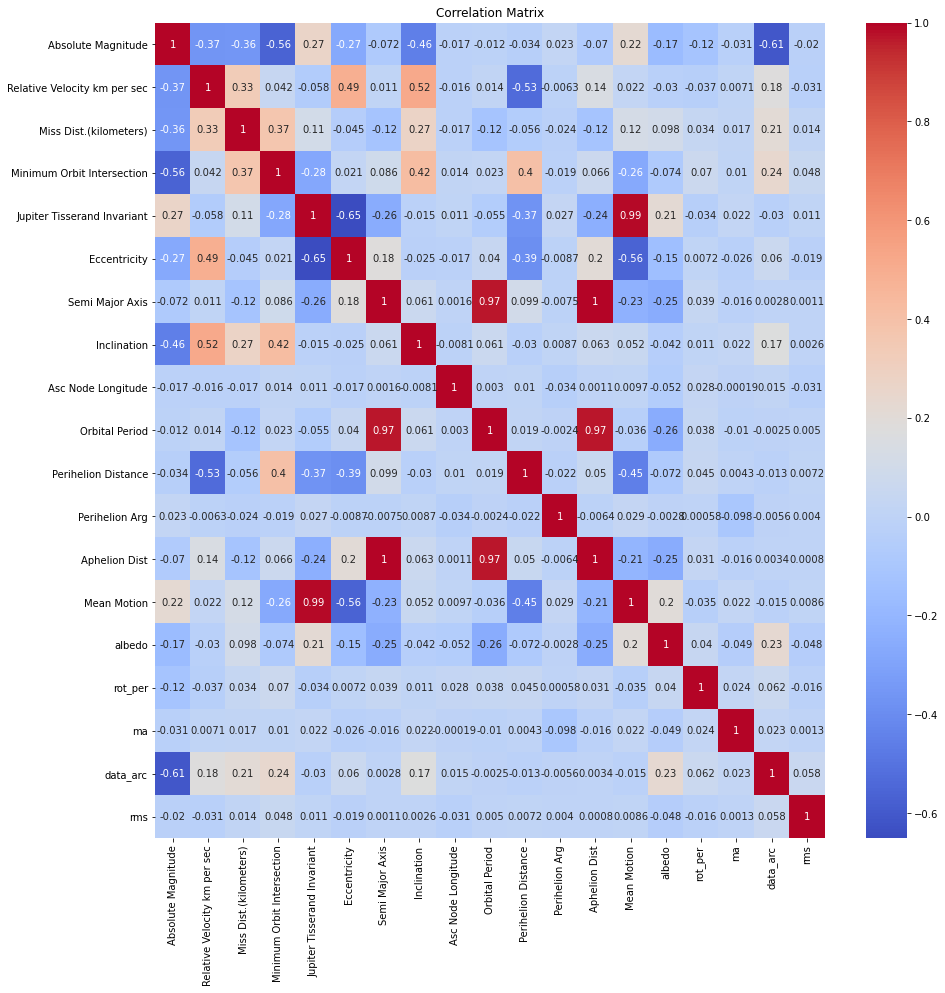

In [42]:
cont_cols = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Miss Dist.(kilometers)', 'Minimum Orbit Intersection',
             'Jupiter Tisserand Invariant', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
             'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Mean Motion', 'albedo',
             'rot_per', 'ma', 'data_arc', 'rms']

# TODO: add avg. Diameter to this list
# TODO: 'Semi Major Axis' and 'Perihelion Distance' have correlation 1 

plt.figure(figsize=(15,15))

sns.heatmap(df[cont_cols].corr(), annot=True , cmap= 'coolwarm')   #setting up the heat map
plt.title('Correlation Matrix')
plt.show()

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


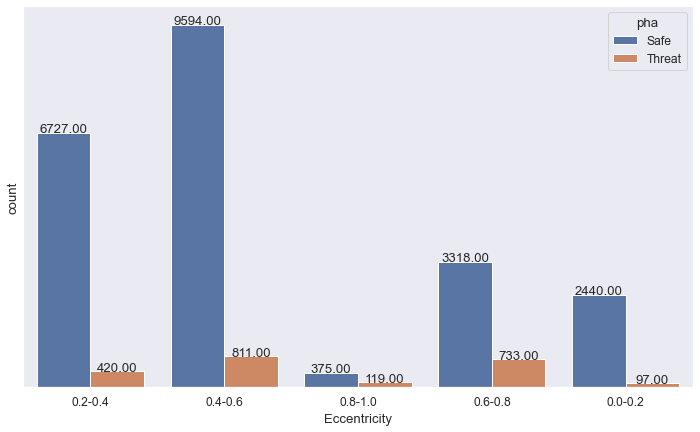

In [85]:
plt.figure(figsize=(12,7))
sns.set(font_scale=1.1)
ecc_groups = df['Eccentricity']*5//1
ecc_groups = ecc_groups.replace({0:'0.0-0.2', 1:'0.2-0.4', 2:'0.4-0.6', 3:'0.6-0.8', 4:'0.8-1.0'})
ax = sns.countplot(ecc_groups, hue=df['pha'].replace({0:'Safe', 1:'Threat'}))
for p in ax.patches:                                        
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 5,'{:1.2f}'.format(height), ha="center")
plt.yticks([])
plt.show()

In [92]:
# TODO: A bargraph based on asteroid diameter for pha vs non pha

413

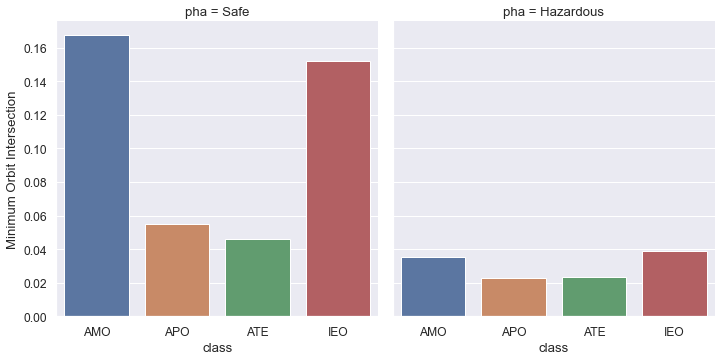

In [146]:
temp = df.copy()
temp['pha'] = df['pha'].replace({0:'Safe', 1:'Hazardous'})
sns.catplot(data=temp, x='class', y='Minimum Orbit Intersection',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

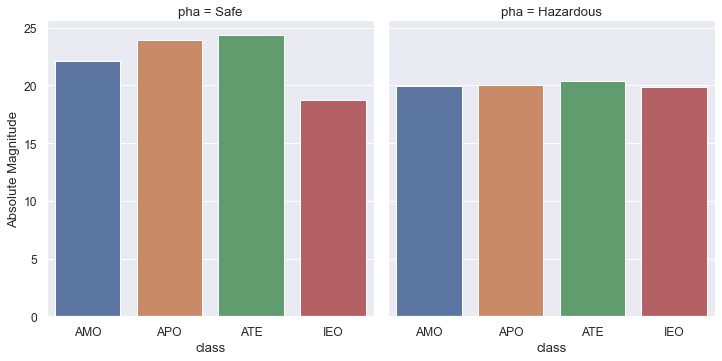

In [151]:
sns.catplot(data=temp, x='class', y='Absolute Magnitude',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

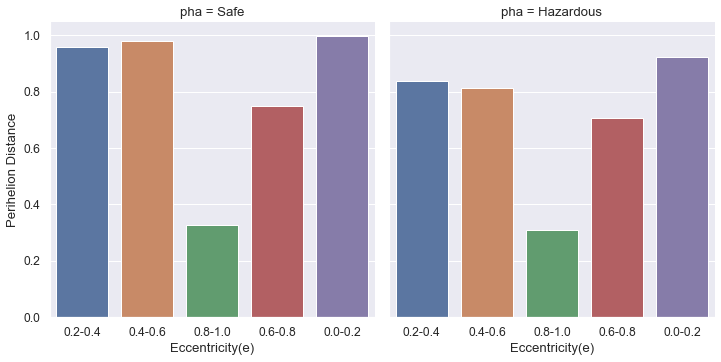

In [157]:
temp['Eccentricity(e)'] = ecc_groups
sns.catplot(data=temp, x='Eccentricity(e)', y='Perihelion Distance',
            col='pha', saturation=.7,kind="bar", ci=None, aspect=1)
plt.show()

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


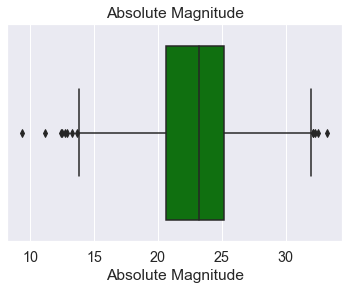

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


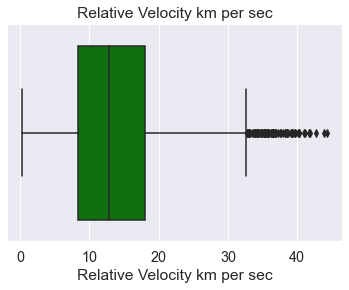

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


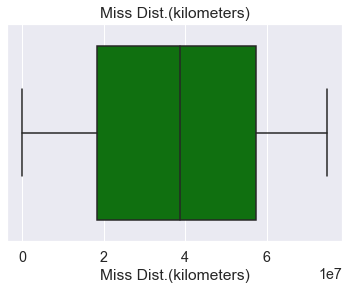

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


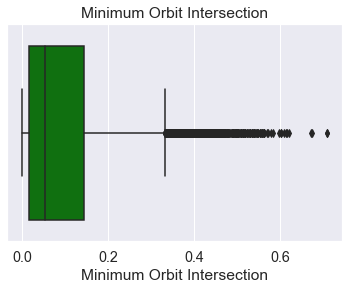

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


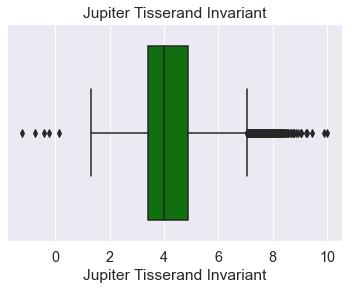

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


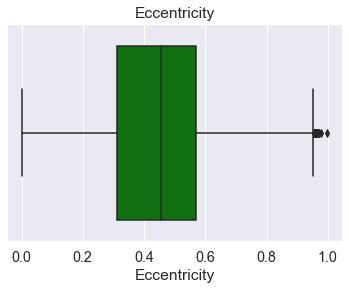

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


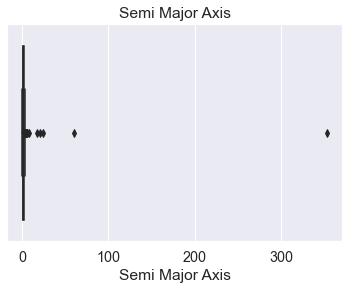

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


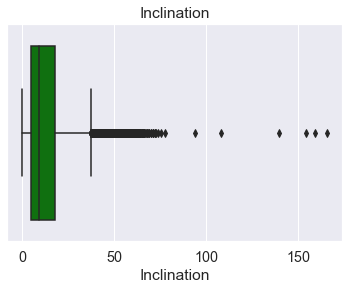

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


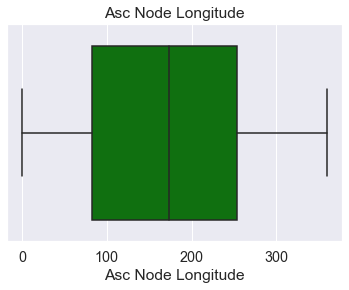

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


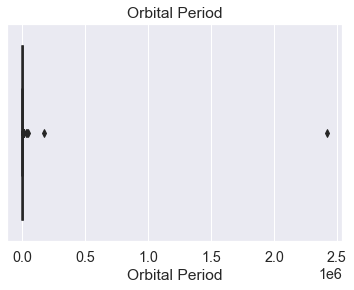

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


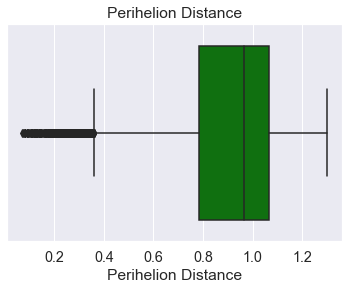

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


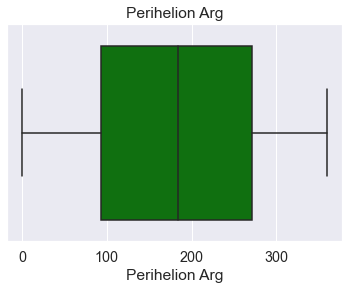

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


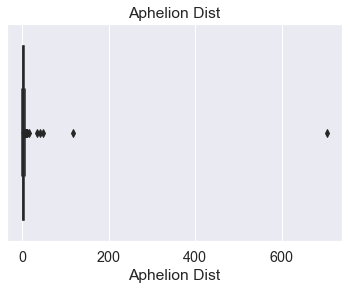

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


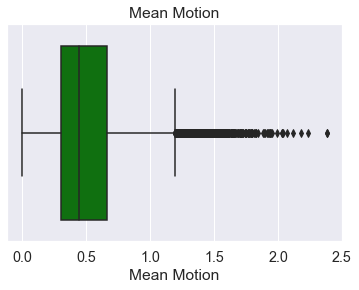

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


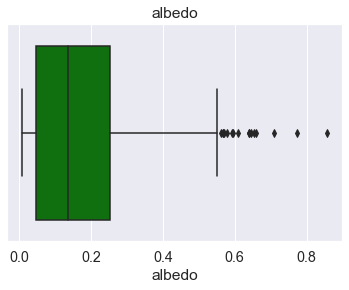

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


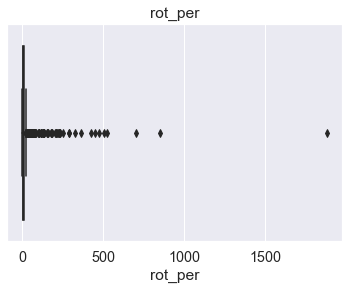

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


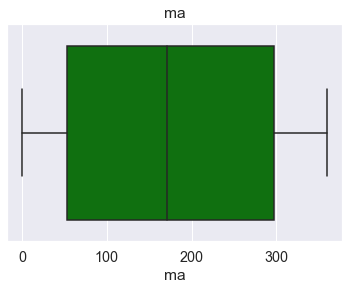

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


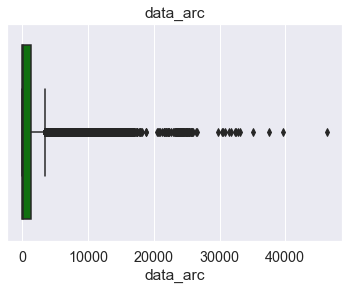

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


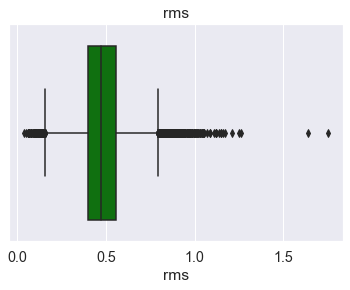

In [166]:
sns.set(font_scale=1.3)
for col in cont_cols:
    sns.boxplot(df[col], color='green')
    plt.title(col)
    plt.show()

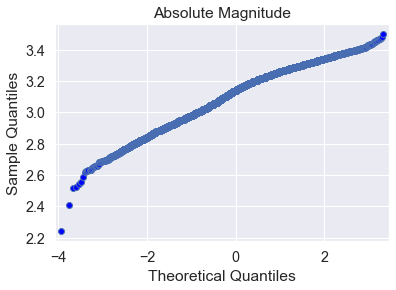

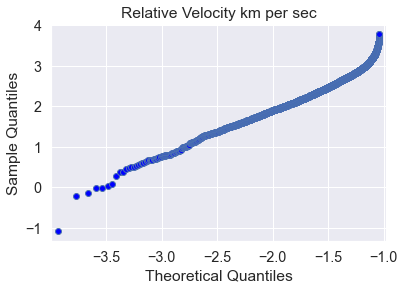

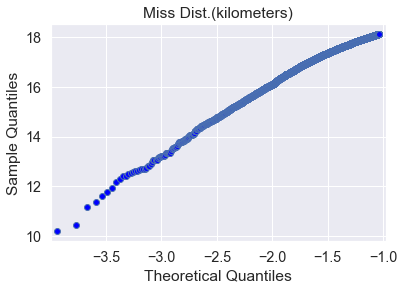

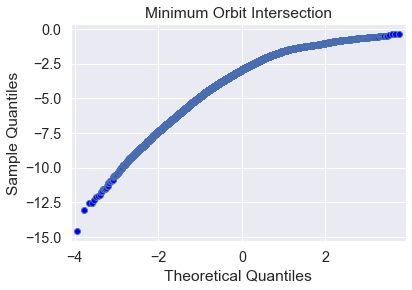

c:\users\darin jeff\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


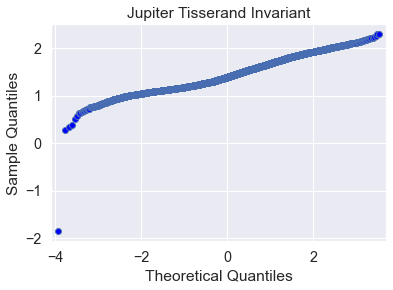

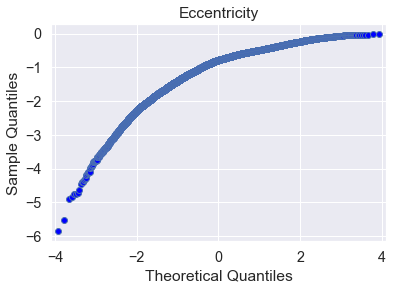

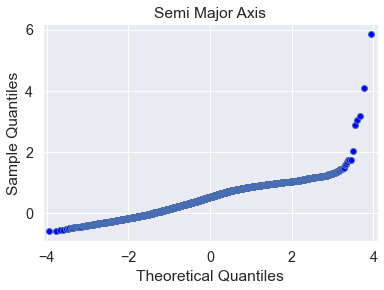

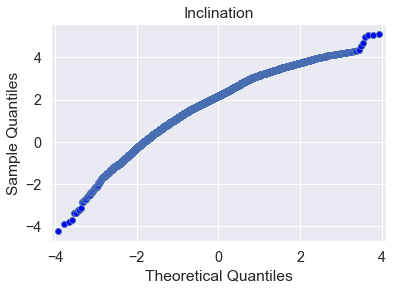

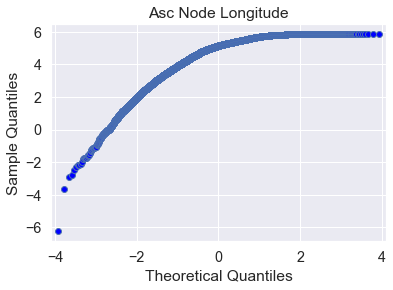

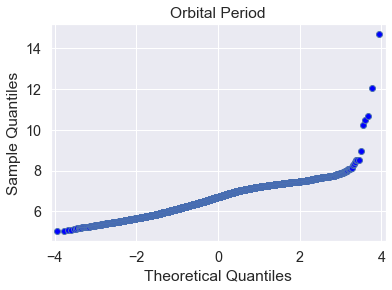

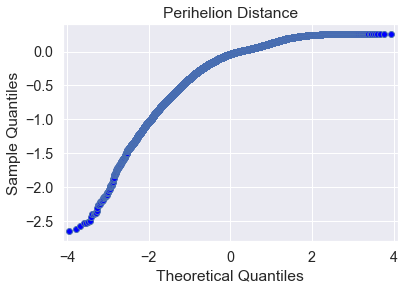

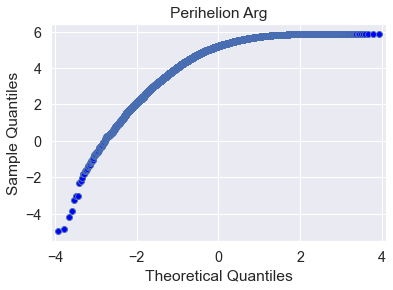

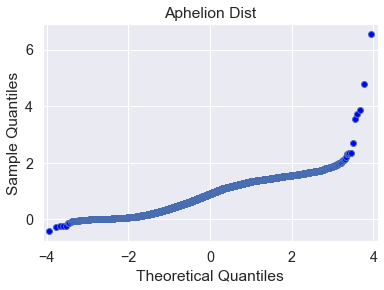

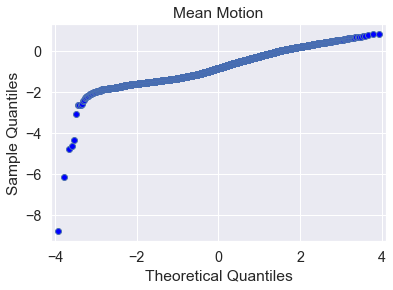

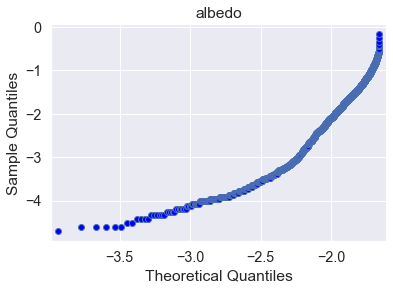

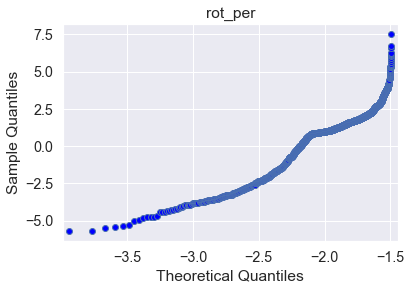

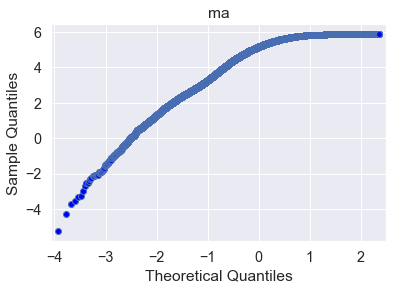

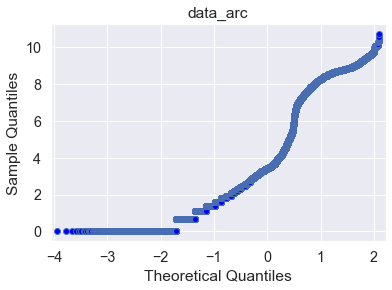

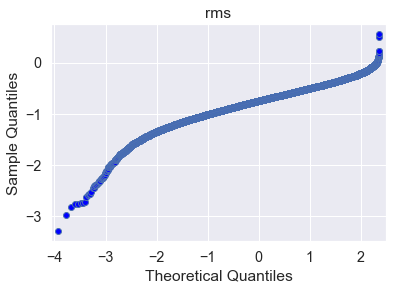

In [165]:
for col in cont_cols:
    fig = sm.qqplot(np.log(df[col]))        #drawing qq plots for the log of the distribution
    plt.title(col)
    plt.show()